<a href="https://colab.research.google.com/github/Sphinx500/Geisers/blob/main/Geiser_and_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IDGS 91
# FERNANDO HERNANDEZ VAZQUEZ

## Problema
Se tiene un conjunto de datos de erupciones de géiseres, y se desea clasificar para su estudio.

Los datos que se tienen son:

* TimeEruption = tiempo de erupcion en minutos.
* TimeWaiting = tiempo de espera para la siguiente erupcion.

## Importar librerias

In [32]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Versiones

In [19]:
print("Pandas {}".format(pd.__version__))
print("Tensorflow {}".format(tf.__version__))
print("Numpy {}".format(np.__version__))
print("sklearn {}".format(sklearn.__version__))

Pandas 1.1.5
Tensorflow 2.7.0
Numpy 1.19.5
sklearn 1.0.1


## Cargar el dataset

In [24]:
df = pd.read_csv("geisers.csv")

## Información del Dataframe

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TimeEruption  272 non-null    float64
 1   TimeWaiting   272 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 4.4 KB


In [26]:
df.head()

,TimeEruption,TimeWaiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [27]:
df.describe()

,TimeEruption,TimeWaiting
count,272.000000,272.000000
mean,3.487783,70.897059
std,1.141371,13.594974
min,1.600000,43.000000
25%,2.162750,58.000000
50%,4.000000,76.000000
75%,4.454250,82.000000
max,5.100000,96.000000


## Graficar el dataframe

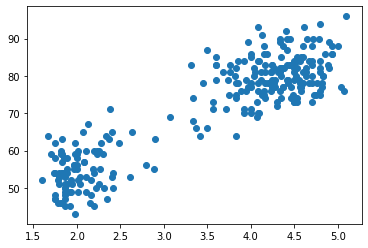

In [34]:
plt.scatter(df['TimeEruption'],df['TimeWaiting'])
plt.show()

## Configurar Modelo

In [35]:
model = KMeans(n_clusters=2,max_iter=100)

## Estandarizar los datos

In [36]:
df = StandardScaler().fit_transform(df)

## Graficar valores estandarizados

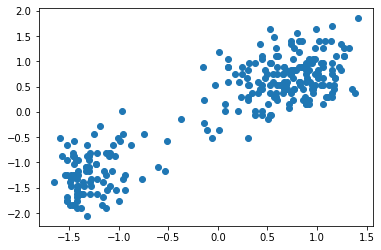

In [37]:
plt.scatter(df[:,0],df[:,1])
plt.show()

## Entrenamiento

In [38]:
model.fit(df)

KMeans(max_iter=100, n_clusters=2)

## Centroides

In [39]:
centroids = model.cluster_centers_
centroids

array([[-1.26008539, -1.20156744],
       [ 0.70970327,  0.67674488]])

## Ver las etiquetas

In [42]:
model.labels_

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1], dtype=int32)

## Graficar los centroides

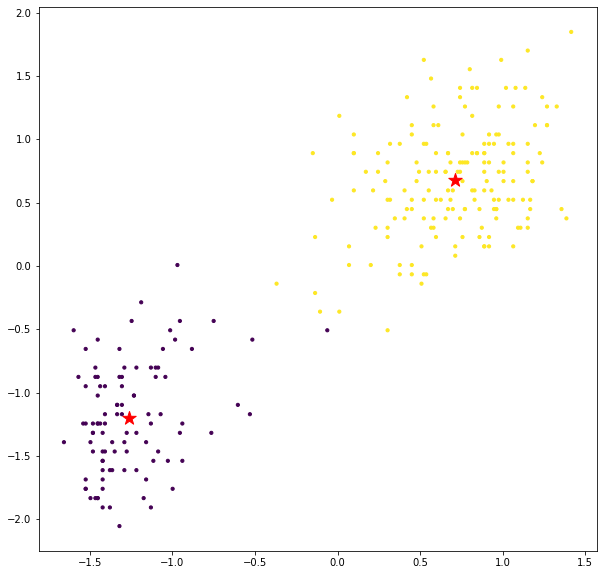

In [51]:
plt.figure(figsize=(10,10))
plt.scatter(df[:,0],df[:,1], c=model.labels_.astype(float),s=10,label="clusters")
plt.scatter(centroids[:,0],centroids[:,1],c="red",marker='*', s=200, label="centroids")
plt.show()

## Predicciones

In [54]:
new_label = model.predict([(-1.0,0.0)])
new_label[0]

0

## Seleccionar numero de Clusters

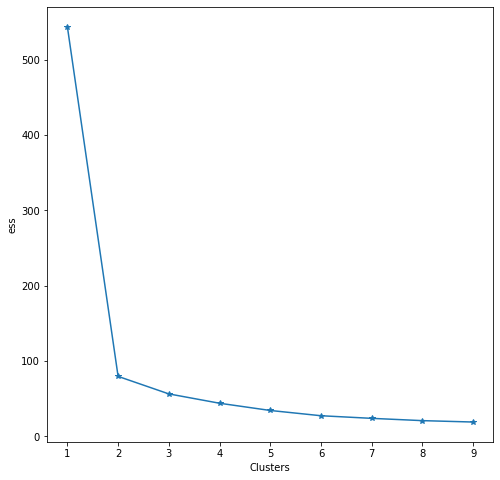

In [55]:
ess = [] 
list_k = list(range(1,10))

for k in list_k:
  model = KMeans(n_clusters=k)
  model.fit(df)
  ess.append(model.inertia_)

plt.figure(figsize=(8,8))
plt.plot(list_k,ess,"-*")
plt.xlabel("Clusters")
plt.ylabel("ess")
plt.show()

## Graficar con distintos clusters

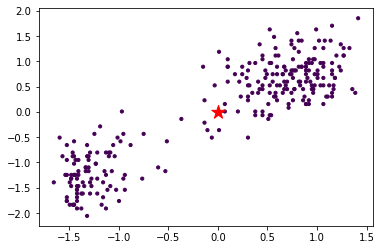

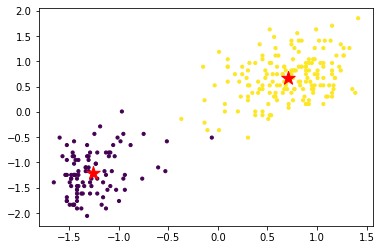

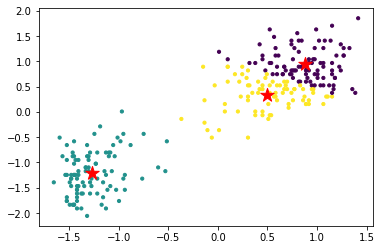

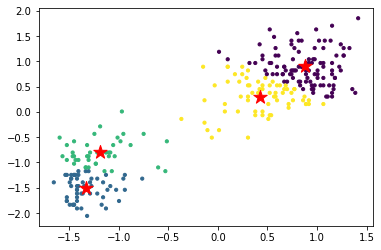

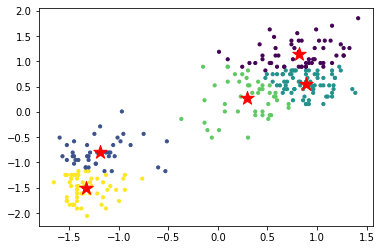

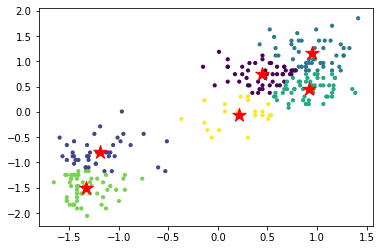

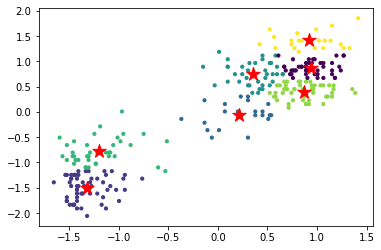

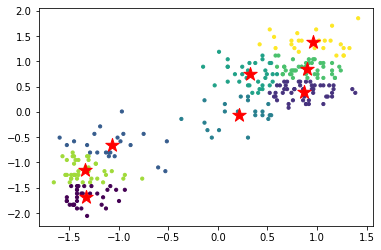

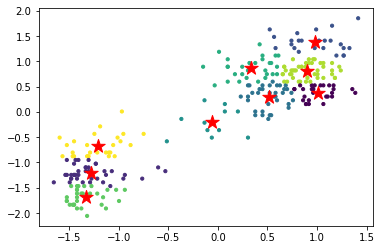

In [56]:
list_k = list(range(1,10))

for k in list_k:
  model = KMeans(n_clusters=k)
  model.fit(df)
  centroids = model.cluster_centers_
  plt.scatter(df[:,0],df[:,1], c=model.labels_.astype(float),s=10,label="clusters")
  plt.scatter(centroids[:,0],centroids[:,1],c='red',marker="*",s=200,label="centroides")
  plt.show()

# Conclusión.

Tal y como podemos observar en esta practica es muy importante, ya que gracias a los clusters podemos encontrar grupos similares dentro de un gran conjunto o conjuntos de datos, lo que nos permite visualizar de manera gráfica las relaciones que existen entre estos.